In [1]:
#import

import numpy as np
import matplotlib.pyplot as plt

from network_control.energies import minimum_energy, minimum_energy_fast
from network_control.utils import matrix_normalization, expand_states
from network_control.plotting import set_plotting_params, reg_plot
set_plotting_params()

In [2]:
# load data
A = np.load('/Users/lindenmp/Google-Drive-Penn/work/research_projects/control_package/A.npy')
A = A[:, :, 0]
A = matrix_normalization(A)
n = np.shape(A)[0]

In [3]:
# setup arbitrary states
n_bins = int(n/40)
bin_size = int(n/n_bins)

states = np.array([])
for i in np.arange(n_bins):
    states = np.append(states, np.ones(bin_size) * i)

x0_mat, xf_mat = expand_states(states)
print(x0_mat.shape)

(400, 100)


## Minimum Energy

In [4]:
i = 50
B = np.eye(n)
x0 = x0_mat[:, i]
xf = xf_mat[:, i]
T = 1
m_x, m_u, n_err = minimum_energy(A, T, B, x0, xf)
n_err

2.6685639435302214e-14

## Minimum Energy Fast

In [5]:
e_fast = minimum_energy_fast(A, T, B, x0_mat, xf_mat)

### Minimum Energy vs Minimum Energy Fast

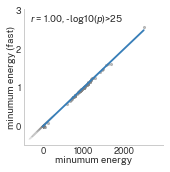

In [6]:
f, ax = plt.subplots(1, 1, figsize=(2.5, 2.5))
reg_plot(x=np.sum(m_u**2, axis=0), y=e_fast[:, i], xlabel='minumum energy', ylabel='minumum energy (fast)', ax=ax)
plt.show()
f.savefig('corr(energy,energy_fast)', dpi=300, bbox_inches='tight', pad_inches=0.1)